<a href="https://colab.research.google.com/github/SherwetG/DataMiningProject/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 1 - Classification

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Lobna ElDeeb

ID: 43-2669

Tutorial: T-02

---

Name: Sherwet Galal

ID: 43-2233

Tutorial: T-02

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## Importing Libraries \& Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/telecom_churn.csv')

## Data Inspection & Cleaning (if any)

**Data Inspection**

In [ ]:
print(df.head())
print(df.isnull().sum())
print(df.info())

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...       $29.85/m       $29.85     No
1  5575-GNVDE    Male              0  ...       $56.95/m      $1889.5     No
2  3668-QPYBK    Male              0  ...       $53.85/m      $108.15    Yes
3  7795-CFOCW    Male              0  ...        $42.3/m     $1840.75     No
4  9237-HQITU  Female              0  ...        $70.7/m      $151.65    Yes

[5 rows x 21 columns]
customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        853
Churn                 0
dtype: int6

It is observed that there are some missing values in two columns: customerID and TotalCharges. It is also observed that data-types that should be numeric are stored as objects. Furthermore, the numeric values in MonthlyCharges and TotalCharges are concatenated with letters and symbols.

**Data Cleaning**

In [ ]:
del df['customerID']
for i in range(len(df['MonthlyCharges'])):
  df['MonthlyCharges'][i] = df['MonthlyCharges'][i].replace('/m','')
  df['MonthlyCharges'][i] = df['MonthlyCharges'][i].replace('$','')
df = df.astype({'MonthlyCharges': 'float64'})
for i in range(len(df['TotalCharges'])):
  df['TotalCharges'][i] = df['MonthlyCharges'][i]*df['tenure'][i]
df = df.astype({'TotalCharges' : 'float64'})

for i in range(len(df['MultipleLines'])):
  df['MultipleLines'][i] = df['MultipleLines'][i].replace('No phone service','No')

for i in range(len(df['OnlineSecurity'])):
  df['OnlineSecurity'][i] = df['OnlineSecurity'][i].replace('No internet service','No')

for i in range(len(df['OnlineBackup'])):
  df['OnlineBackup'][i] = df['OnlineBackup'][i].replace('No internet service','No')

for i in range(len(df['DeviceProtection'])):
  df['DeviceProtection'][i] = df['DeviceProtection'][i].replace('No internet service','No')

for i in range(len(df['TechSupport'])):
  df['TechSupport'][i] = df['TechSupport'][i].replace('No internet service','No')

for i in range(len(df['StreamingTV'])):
  df['StreamingTV'][i] = df['StreamingTV'][i].replace('No internet service','No')

for i in range(len(df['StreamingMovies'])):
  df['StreamingMovies'][i] = df['StreamingMovies'][i].replace('No internet service','No')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Steps taken to clean the data:
1. CustomerID column is completely dropped, as it is not necessary in the dataset, and is therefore redundant.
2. Then we corrected the values in the MonthlyCharges column to be able to convert the data-type to numeric.
3. We then re-calculate the values in the TotalCharges column by multiplying the monthly charges to the tenure, in order to fill in the missing values and ensure that the previously entered values are corrected.
4. Finally, we looped over the columns MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies to replacing the redundant values of "No internet service" and "No phone service" with "no" in order to be able to treat the values as binary.

## Exploratory Data Analysis

**Q0 (example): How long do churned customers stay with the company before leaving?**

In [ ]:
df.loc[df['Churn'] == 'Yes', 'tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

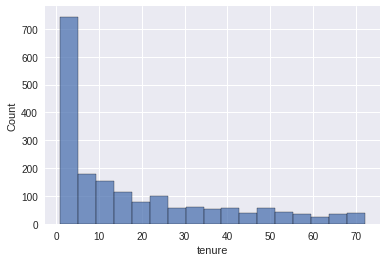

In [ ]:
sns.histplot(x='tenure', data=df[df['Churn'] == 'Yes']);

*Example Note: A histogram was chosen to show the distribution of tenure of churned customers. Alternatively, a violin plot or a box plot may also be used.*

**Answer**: 75% of churned customers stayed with the company 2.5 years before leaving. 50% of churned customers left in just 10 months.

**Q1: What are the most correlated attributes with customer churn?**

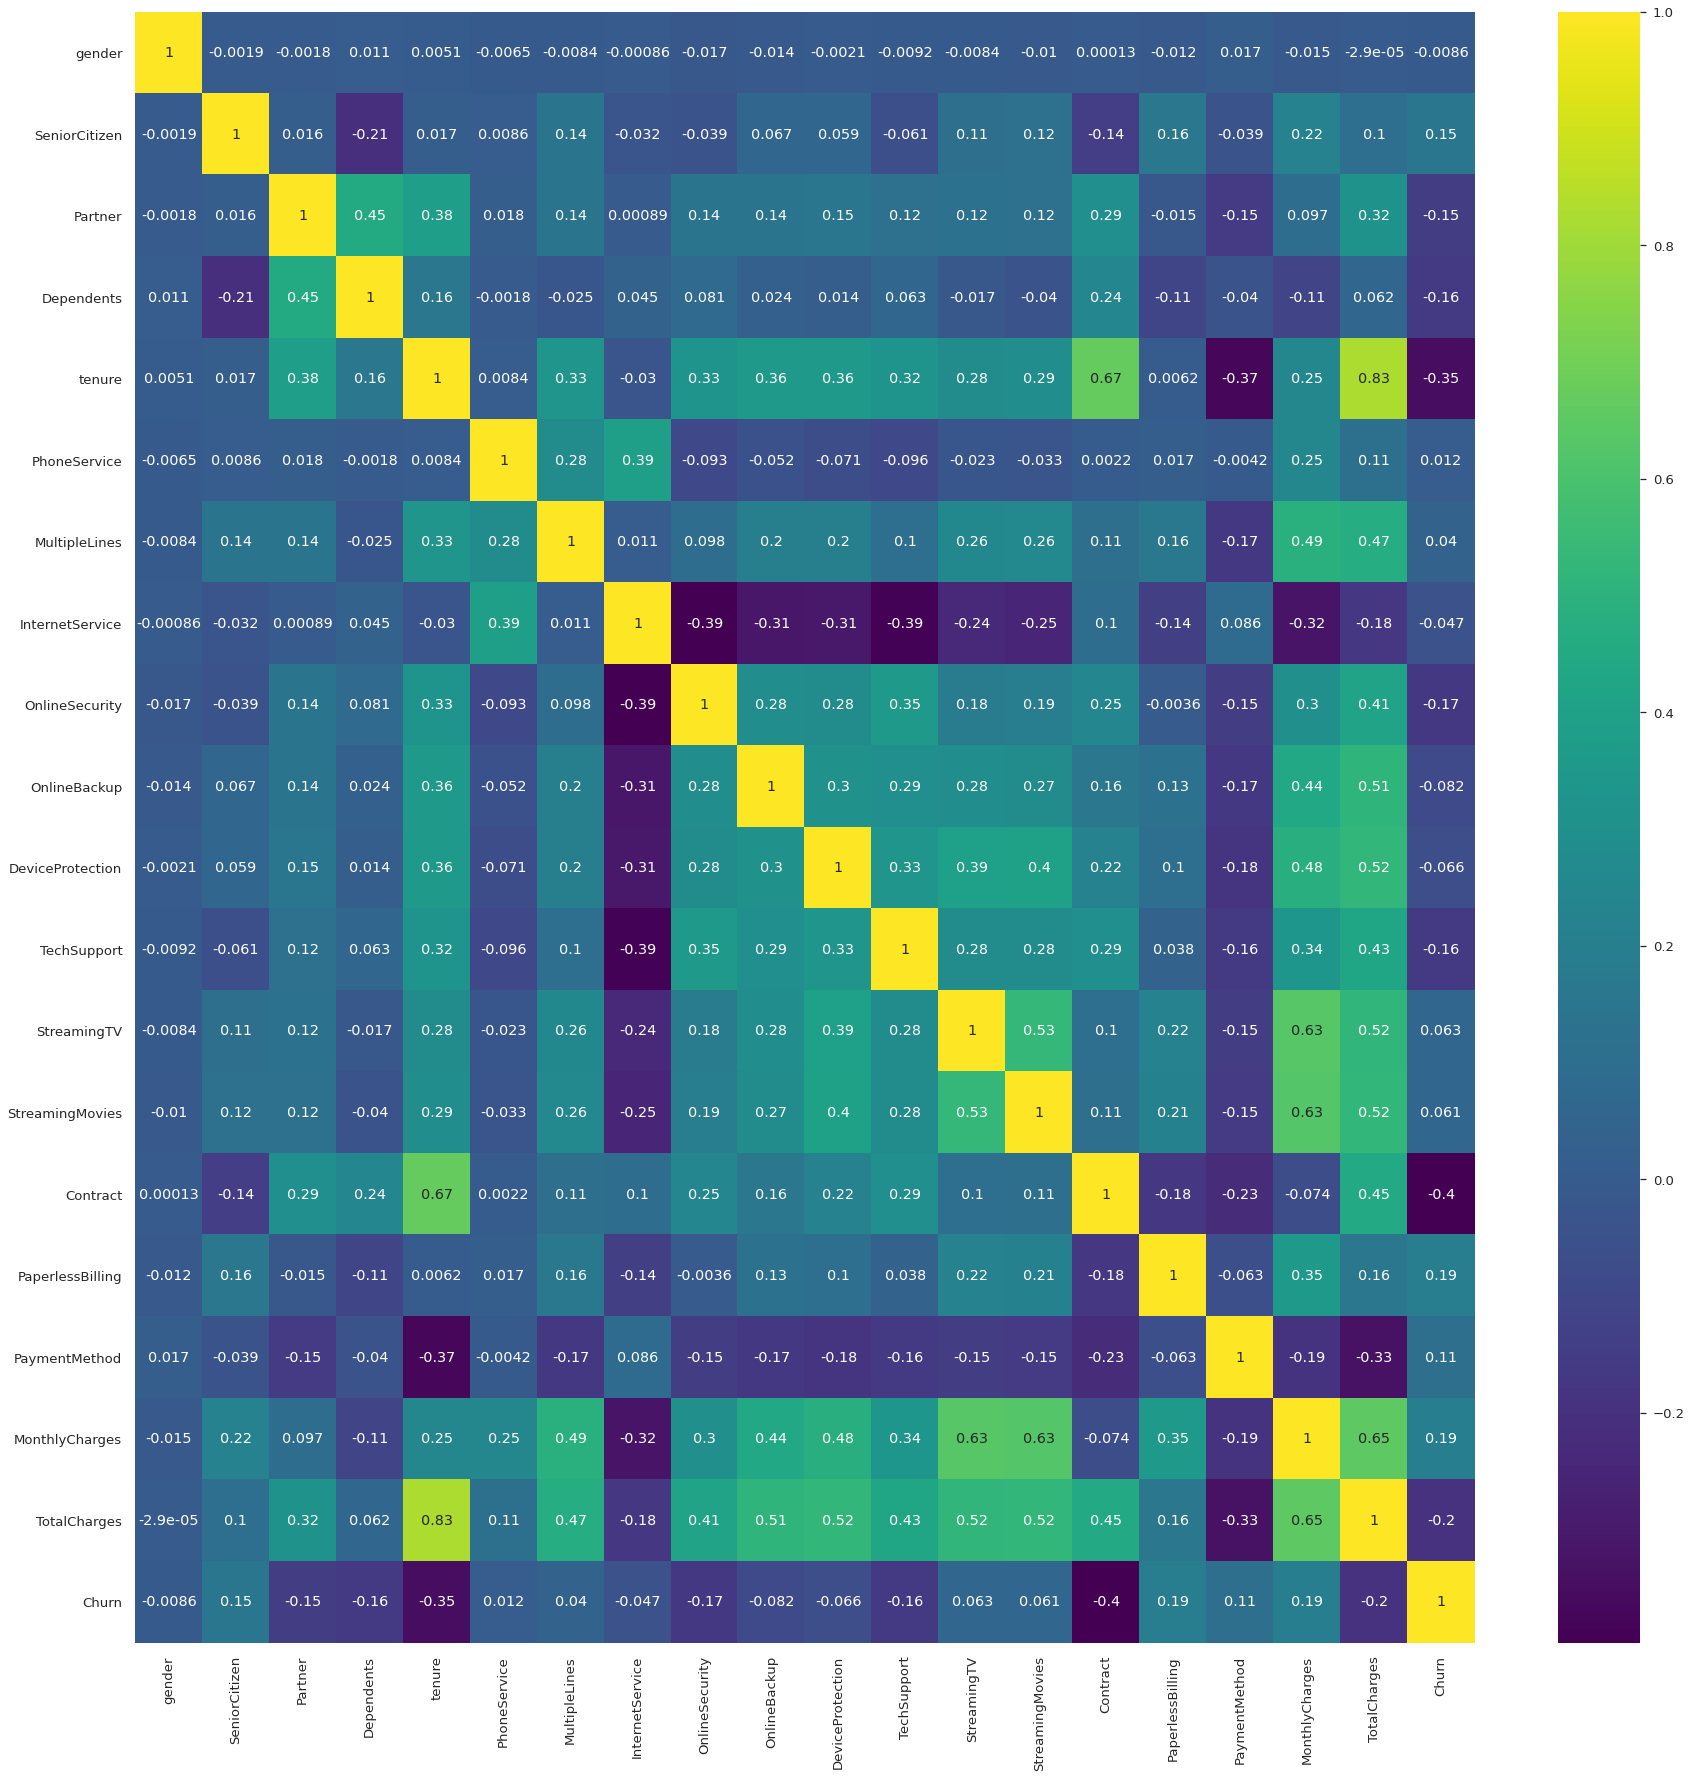

In [ ]:
df2 = df.copy()
df2['Churn'] = df2['Churn'].astype({'Churn' : 'category'}).cat.codes
df2['gender'] = df2['gender'].astype({'gender' : 'category'}).cat.codes
df2['Partner'] = df2['Partner'].astype({'Partner' : 'category'}).cat.codes
df2['Dependents'] = df2['Dependents'].astype({'Dependents' : 'category'}).cat.codes
df2['PhoneService'] = df2['PhoneService'].astype({'PhoneService' : 'category'}).cat.codes
df2['MultipleLines'] = df2['MultipleLines'].astype({'MultipleLines' : 'category'}).cat.codes
df2['InternetService'] = df2['InternetService'].astype({'InternetService' : 'category'}).cat.codes
df2['OnlineSecurity'] = df2['OnlineSecurity'].astype({'OnlineSecurity' : 'category'}).cat.codes
df2['OnlineBackup'] = df2['OnlineBackup'].astype({'OnlineBackup' : 'category'}).cat.codes
df2['DeviceProtection'] = df2['DeviceProtection'].astype({'DeviceProtection' : 'category'}).cat.codes
df2['TechSupport'] = df2['TechSupport'].astype({'TechSupport' : 'category'}).cat.codes
df2['StreamingTV'] = df2['StreamingTV'].astype({'StreamingTV' : 'category'}).cat.codes
df2['StreamingMovies'] = df2['StreamingMovies'].astype({'StreamingMovies' : 'category'}).cat.codes
df2['Contract'] = df2['Contract'].astype({'Contract' : 'category'}).cat.codes
df2['PaperlessBilling'] = df2['PaperlessBilling'].astype({'PaperlessBilling' : 'category'}).cat.codes
df2['PaymentMethod'] = df2['PaymentMethod'].astype({'PaymentMethod' : 'category'}).cat.codes

sns.set(font_scale=1.2)

plt.figure(figsize=(30,30))

corr = df2.corr()
corr

sns.heatmap(corr, cmap='viridis', annot=True)

According to the heatmap row related to the Churn, the highest correlating values are as follows:


1.   Absolute highest correlation attributes are tenure at -0.35 and Contract at -0.4.
2.   Highest positively correlated attributes are MonthlyCharges at 0.19 and PaperlessBilling at 0.19.
3.   Highest negatively correlated attributes are tenure at -0.35 and Contract at -0.4.



**Q2: Are senior citizens more likely to churn than non-senior citizens?**

Text(0.5, 0, 'SeniorCitizen')

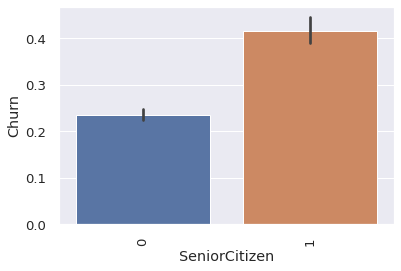

In [ ]:
df = df.astype({'SeniorCitizen' : 'object'})

g = sns.barplot(x='SeniorCitizen', y='Churn', data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn')
plt.xlabel('SeniorCitizen')


According to the bar plot, senior citizens are more likely to churn.

**Q3: Which payment method has the highest churn rate?**

Text(0.5, 0, 'PaymentMethod')

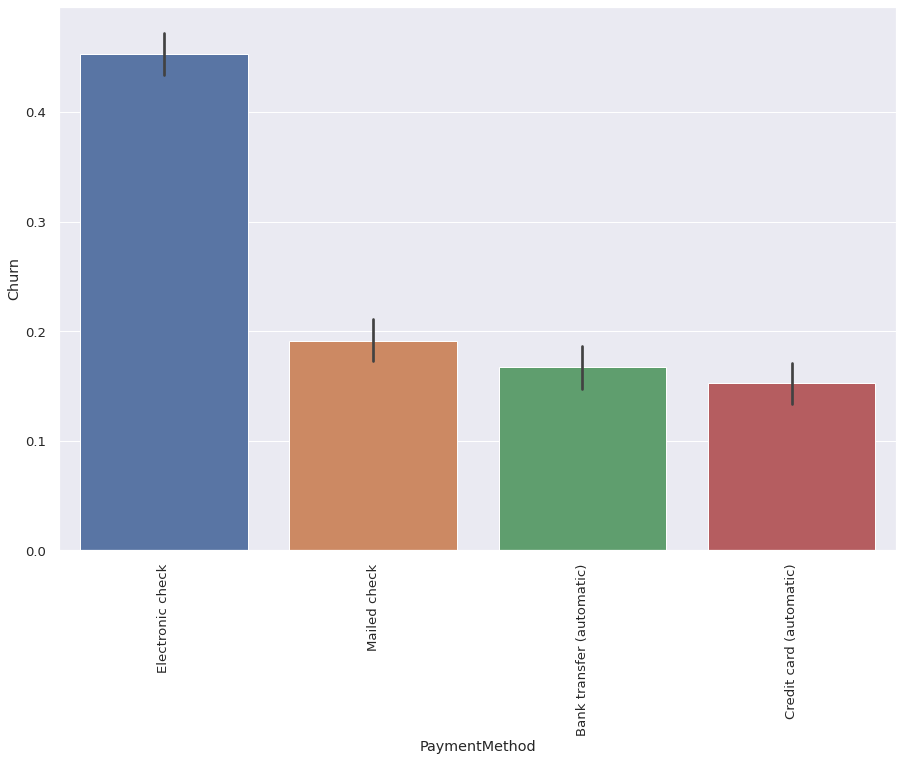

In [ ]:
df2['PaymentMethod'] = df['PaymentMethod']
plt.figure(figsize=(15,10))
a = sns.barplot(x='PaymentMethod', y='Churn', data=df2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.ylabel('Churn')
plt.xlabel('PaymentMethod')
#sns.histplot(x='PaymentMethod', data=df[df['Churn'] == 'Yes']);

The payment method that results in the highest churn rate is Electronic check.

## Modelling

**Encoding Dataframe**

In [ ]:
df3 = df.copy()
cols = ['gender','Partner','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

df3_encoded = pd.get_dummies(df3, columns=cols)

df3_encoded['Churn'] = df3['Churn'].astype({'Churn' : 'category'}).cat.codes
df3_encoded


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1936.30,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,2,53.85,107.70,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1903.50,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,141.40,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,2035.20,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7430.40,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,325.60,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,297.60,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


**Dividing Dataset to Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

X = df3_encoded.drop('Churn', axis=1)
y = df3_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Our dataset is divided into a training dataset and a testing dataset to be used to train and evaluate our model.

**Training The Model** 

We decided to use Logistic Regression as a classification model, as it is the most appropriate model according to the dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1250)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluation

In [ ]:
lr_model.score(X_test, y_test)

0.8102224325603408

The accuracy level of using Logistic Regression is 0.8097491717936584

## Bonus (Optional)

Here we use K - Nearest Neighbor as a classification model. We initialize the model, then train it, and finally evaluate its accuracy with the test dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)


0.7557974443918599

Here we use Naive Bayes Classifier as a classification model. We initialize the model, then train it, and finally evaluate its accuracy with the test dataset.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)

0.763369616658779

Comparing the accuracy of the K-NN model, the Naive Bayes model and the Logistic Regression model, we find that the model with the highest accuracy is the Logistic Regression model. Following that, the Naive Bayes is second best, and K-NN is the worst.

Therefore, using Logistic Regression would be the ideal decision.